In [1]:
import glob
from PIL import Image, ImageOps, ImageFilter

def read_all_png(path):
    image_list = []
    for filename in glob.glob(path):
        im=Image.open(filename)
        image_list.append(im)
    return image_list

In [2]:
def crop_all_blocks(image_list, new_size, save_path, contour=True):
    rename = 1
    for i in image_list:
        im = i.crop(new_size)
        if contour:
            im = im.filter(ImageFilter.CONTOUR)
        im.save(save_path+'_'+str(rename)+'.png')
        rename+=1

In [3]:
images = read_all_png('capturas/*.png')
crop_all_blocks(images, (1175, 235, 1275, 335), 'trainprueba/')

In [4]:
import pyautogui
# Capturar pantalla.
screenshot = pyautogui.screenshot()
# Formato imagen.
crop_all_blocks([screenshot], (1175, 290, 1275, 390), 'instantblock/')

In [3]:
board_images = read_all_png('capturas/*.png')

Populating the interactive namespace from numpy and matplotlib


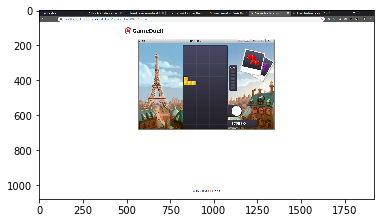

In [4]:
import matplotlib.pyplot as plt
%pylab inline

imgplot = plt.imshow(board_images[0])
plt.show()

In [5]:
crop_all_blocks(board_images, (821, 200, 1084, 685), 'trainboard/', False)

In [6]:
square_images = read_all_png('trainboard/*.png')

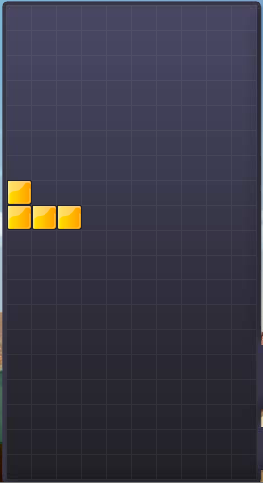

In [7]:
square_images[0]

In [8]:
np.array(square_images[0])

array([[[126, 183, 213],
        [125, 182, 212],
        [125, 182, 212],
        ...,
        [126, 165, 203],
        [124, 166, 203],
        [124, 166, 203]],

       [[126, 183, 213],
        [125, 182, 212],
        [125, 182, 212],
        ...,
        [126, 165, 203],
        [124, 166, 203],
        [124, 166, 203]],

       [[126, 183, 213],
        [125, 182, 212],
        [125, 182, 212],
        ...,
        [126, 165, 203],
        [123, 167, 203],
        [123, 167, 203]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [11]:
def block_representative_pixels(imagen):
    width = int(263/10)
    length = int(485/19)

    posx = 0
    posy = 0

    block_pos1d = []

    while posx+width<=263:
        posx += width - 1
        while posy+length<=485:
            posy += length -1
            block_pos1d.append([posx-int(width/2), posy-int(length/2)])
        posy = 0
    
    all_board_block_pos2d = []
    for p in block_pos1d:
        block_pos2dx = []
        for i in range(7):
            block_pos2dy = []
            for j in range(7):
                block_pos2dy.append([im for im in imagen[p[1]+(i-4)][p[0]+(j-4)]])
            block_pos2dx.append(block_pos2dy)
        all_board_block_pos2d.append(block_pos2dx)      
    return np.array(all_board_block_pos2d)

new_x = block_representative_pixels(np.array(square_images[0]))
    
print([np.average(i) for i in new_x])

[80.74829931972789, 78.95238095238095, 77.99319727891157, 75.80952380952381, 73.19727891156462, 71.87074829931973, 68.41496598639456, 98.83673469387755, 130.31972789115648, 129.8095238095238, 56.795918367346935, 53.734693877551024, 51.244897959183675, 48.69387755102041, 45.7687074829932, 43.666666666666664, 41.625850340136054, 38.564625850340136, 37.333333333333336, 34.68027210884354, 79.85714285714286, 79.33333333333333, 78.33333333333333, 75.80952380952381, 72.95238095238095, 71.38095238095238, 68.47619047619048, 67.38095238095238, 77.93197278911565, 129.83673469387756, 56.285714285714285, 54.142857142857146, 51.142857142857146, 48.666666666666664, 45.80952380952381, 43.38095238095238, 41.476190476190474, 39.61904761904762, 38.333333333333336, 35.04761904761905, 79.85714285714286, 79.33333333333333, 78.33333333333333, 75.80952380952381, 72.95238095238095, 71.38095238095238, 68.47619047619048, 67.38095238095238, 77.93197278911565, 129.83673469387756, 56.285714285714285, 54.14285714285

In [13]:
def save_all_squares(image_list):  
    width = int(263/10)
    length = int(485/19)

    posx = 0
    posy = 0

    block_pos = []

    while posx+width<=263:
        posx += width - 1
        while posy+length<=485:
            posy += length -1
            block_pos.append([posx-int(width/2), posy-int(length/2)])
        posy = 0
    
    rename = 1
    for cell_image in image_list:
        image = block_representative_pixels(np.array(cell_image))
        for i in image:
            im = Image.fromarray(i)
            if np.average(i)<90:
                im.save('squares/black/'+'_'+str(rename)+'.png')
            else:
                im.save('squares/color/'+'_'+str(rename)+'.png')
            rename+=1
        
save_all_squares(read_all_png('trainboard/*.png'))